# Name: Ghalib Ammar Kazim
Student ID: 21031364

# Natural Resources and Climate Change

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading Data

In [2]:
def read_wbdata(filename):
    '''
    Returns two dataframes one with country as columns and the other with years as columns
    '''
    df = pd.read_csv(filename,skiprows=3)
    yrs_df = df.set_index('Country Name').drop(labels=['Country Code', 'Indicator Name','Indicator Code','Unnamed: 65'],axis=1)
    cou_df = yrs_df.transpose()
    return yrs_df, cou_df

In [3]:
#reading emmissions data
em_df1, em_df2 = read_wbdata('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3731558.csv')

In [4]:
#reading forest data
for_df1, for_df2 = read_wbdata('API_AG.LND.FRST.ZS_DS2_en_csv_v2_3890972.csv')

In [5]:
#reading forest data
wat_df1, wat_df2 = read_wbdata('API_ER.H2O.FWTL.ZS_DS2_en_csv_v2_3919483.csv')

In this report we will explore the relationship between a country’s natural resources and its CO2 emissions.


Let's explore the correlations of natural resources and CO2 emissions. We'll start with water.

In [6]:
def correlation(df1,df2):
    '''
    Calculates correlation between two dataframes with countries as columns
    returns sorted series of correlations
    
    '''
    corr_dict = dict()
    countries = df1.columns
    for country in countries:
        series1 = df1[country]
        series2 = df2[country]
        corr = pd.DataFrame({'first':series1, 'second':series2}).corr()
        corr_dict[country] = corr['first']['second']
    corr_ser = pd.Series(corr_dict).dropna().sort_values()
    return corr_ser
    

In [7]:
def plot_corrs(corrs,title):
    '''
    Plot correlations and straight line for mean of correlations
    '''
    corrs.plot()
    plt.plot([0,len(corrs)],[corrs.mean(),corrs.mean()])
    plt.title(title)
    plt.show()

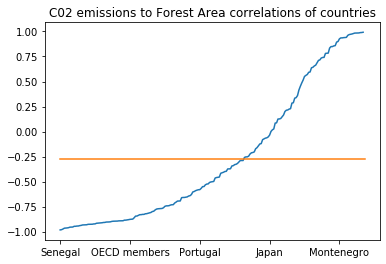

In [8]:
corrs = correlation(em_df2,for_df2)
plot_corrs(corrs,'C02 emissions to Forest Area correlations of countries')

The above graph shows the correlation between CO2 emissions and freshwater withdrawals of all countries. The orange line on the graph shows the mean correlation. We can observe that the graph is skewed towards the top left meaning overall the correlation is positive this can also be seen as the mean correlation is just above 0.25. This means that on average withdrawing more freshwater leads to increasing CO2 emissions.

In [9]:
corrs = correlation(em_df2,wat_df2)

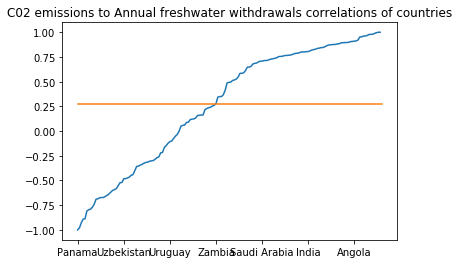

In [10]:
plot_corrs(corrs,'C02 emissions to Annual freshwater withdrawals correlations of countries')

Similar analysis can be done with Forest Area. This time however the results are different. Forest Area is on average negatively proportional to CO2 emissions. Again the average being just below -0.25 shown by the orange line. The curve is bent to the bottom left this time showing the inverse correlation.

This means that both freshwater and forest area are important in controlling CO2 emissions. Let's look at the latest statistics of the world and major countries to see where we stand at the moment.

In [64]:
def country_pie(country,df,labels,title):
    x = df[country].dropna().tail(1)
    plt.pie([x[0],100-x[0]],labels=labels)
    plt.title(f'{country} {title} ({x.index[0]})')
    plt.show()

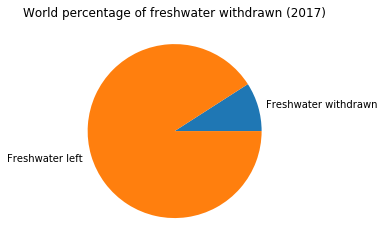

In [65]:
country_pie('World',wat_df2,['Freshwater withdrawn','Freshwater left'],'percentage of freshwater withdrawn')

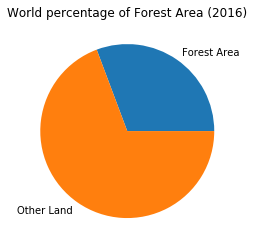

In [66]:
country_pie('World',for_df2,['Forest Area','Other Land'],'percentage of Forest Area')

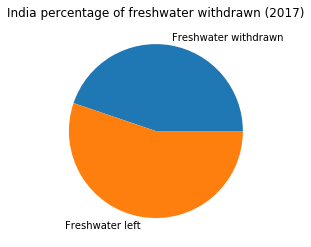

In [67]:
country_pie('India',wat_df2,['Freshwater withdrawn','Freshwater left'],'percentage of freshwater withdrawn')

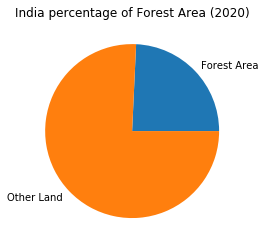

In [68]:
country_pie('India',for_df2,['Forest Area','Other Land'],'percentage of Forest Area')

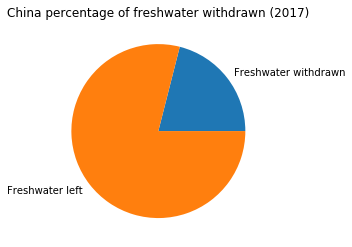

In [69]:
country_pie('China',wat_df2,['Freshwater withdrawn','Freshwater left'],'percentage of freshwater withdrawn')

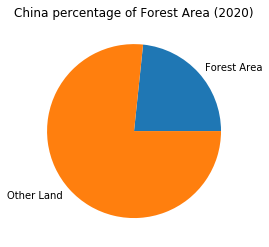

In [70]:
country_pie('China',for_df2,['Forest Area','Other Land'],'percentage of Forest Area')

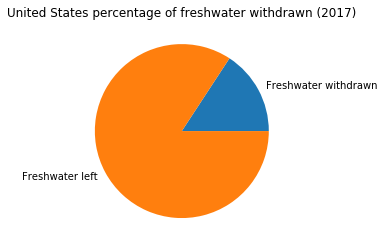

In [71]:
country_pie('United States',wat_df2,['Freshwater withdrawn','Freshwater left'],'percentage of freshwater withdrawn')

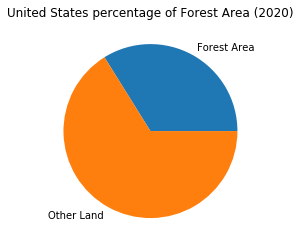

In [72]:
country_pie('United States',for_df2,['Forest Area','Other Land'],'percentage of Forest Area')

In conclusion, both water and forest areas are extremely significant in controlling CO2 emissions. Countries should try their best to avoid deforestation and plant as many trees as possible. It is also important that countries responsibly use their freshwater for agricultural, industrial and domestic uses. The latest world statistics show promise however much better results are needed to control the worrying issue of climate change.